# Examen 1

In [11]:
import gymnasium as gym
import numpy as np

Definicion del problema

In [12]:
class FrozenLakeMDP:
    def __init__(self, nombre_entorno="FrozenLake-v1", es_resbaladizo=True):
        self.entorno = gym.make(nombre_entorno, is_slippery=es_resbaladizo)

        self.n_estados = self.entorno.observation_space.n  # 16 estados
        self.n_acciones = self.entorno.action_space.n  # 4 acciones (izq, abajo, der, arriba)

        self.descripcion = """
        El problema del Lago Congelado es un MDP donde un agente debe llegar a la meta sin caer en agujeros.
        - Estados: 16 (correspondientes a un tablero 4x4).
        - Acciones: 4 (izquierda, abajo, derecha, arriba).
        - Transiciones: Probabilísticas si el hielo es resbaladizo.
        - Recompensas: 1 por llegar a la meta, 0 en cualquier otro caso.
        """

        self.gamma = 0.99

    def obtener_definicion_problema(self):
        return self.descripcion

Framework MDP

In [14]:
class MDPFramework:
    def __init__(self, nombre_entorno="FrozenLake-v1", es_resbaladizo=True, gamma=0.99):
        self.entorno = gym.make(nombre_entorno, is_slippery=es_resbaladizo)

        self.n_estados = self.entorno.observation_space.n
        self.n_acciones = self.entorno.action_space.n
        self.gamma = gamma

        self.transiciones = self._extraer_transiciones()
        self.recompensas = self._extraer_recompensas()

    def _extraer_transiciones(self):
        transiciones = {}
        entorno_sin_envuelta = self.entorno.unwrapped

        for estado in range(self.n_estados):
            transiciones[estado] = {}
            for accion in range(self.n_acciones):
                transiciones[estado][accion] = entorno_sin_envuelta.P[estado][accion]

        return transiciones

    def _extraer_recompensas(self):
        recompensas = np.zeros((self.n_estados, self.n_acciones))
        entorno_sin_envuelta = self.entorno.unwrapped

        for estado in range(self.n_estados):
            for accion in range(self.n_acciones):
                for prob, estado_siguiente, recompensa, terminado in entorno_sin_envuelta.P[estado][accion]:
                    recompensas[estado][accion] += prob * recompensa

        return recompensas

    def obtener_probabilidades_transicion(self, estado, accion):
        return self.transiciones[estado][accion]

    def obtener_recompensa(self, estado, accion):
        return self.recompensas[estado][accion]

    def obtener_acciones_posibles(self, estado):
        return list(range(self.n_acciones))

    def reiniciar(self):
        return self.entorno.reset()[0]

    def paso(self, accion):
        return self.entorno.step(accion)

    def cerrar(self):
        self.entorno.close()

Sarsa - Episode 0 complete
Sarsa - Episode 100 complete
Sarsa - Episode 200 complete
Sarsa - Episode 300 complete
Sarsa - Episode 400 complete
Q-Learning - Episode 0 complete
Q-Learning - Episode 100 complete
Q-Learning - Episode 200 complete
Q-Learning - Episode 300 complete
Q-Learning - Episode 400 complete
Sarsa - Episode 0 complete
Sarsa - Episode 100 complete
Sarsa - Episode 200 complete
Sarsa - Episode 300 complete
Sarsa - Episode 400 complete
Sarsa - Episode 500 complete
Sarsa - Episode 600 complete
Sarsa - Episode 700 complete
Sarsa - Episode 800 complete
Sarsa - Episode 900 complete
Q-Learning - Episode 0 complete
Q-Learning - Episode 100 complete
Q-Learning - Episode 200 complete
Q-Learning - Episode 300 complete
Q-Learning - Episode 400 complete
Q-Learning - Episode 500 complete
Q-Learning - Episode 600 complete
Q-Learning - Episode 700 complete
Q-Learning - Episode 800 complete
Q-Learning - Episode 900 complete
Sarsa - Episode 0 complete
Sarsa - Episode 100 complete
Sarsa -

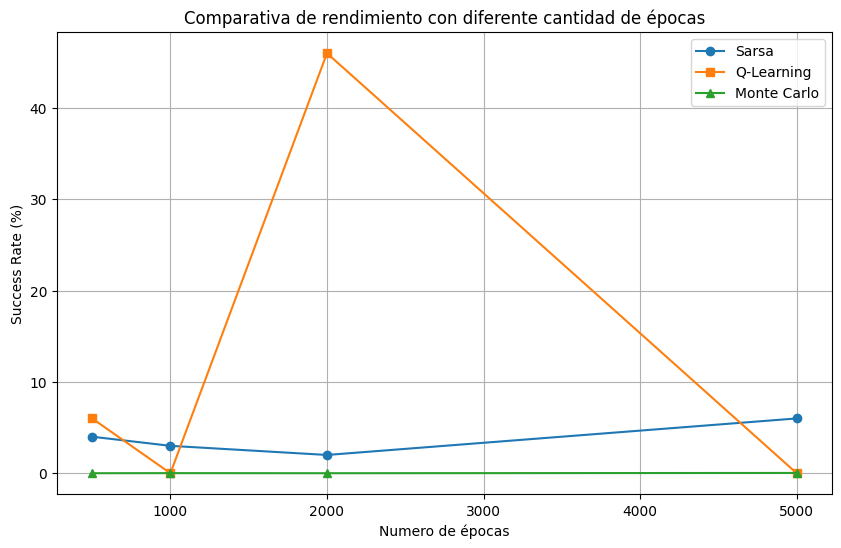

In [4]:
import gymnasium as gym
import matplotlib.pyplot as plt
from Algoritmos import *
from Algoritmos2 import *
from FrozenLakeMDP import FrozenLakeMDP

# Define different episode counts to test
epochs_list = [500, 1000, 2000, 5000]

# Store results
sarsa_results = []
qlearning_results = []
montecarlo_results = []

env = FrozenLakeMDP()

for epochs in epochs_list:
    # Sarsa
    sarsa = Sarsa(env.entorno, alpha=env.alpha, gamma=env.gamma, epsilon=env.epsilon)
    sarsa.fit(epochs)
    sarsa_success_rate = sarsa.predict(100)
    sarsa_results.append(sarsa_success_rate)
    
    # Q-Learning
    qlearning = Qlearning(env.entorno, alpha=env.alpha, gamma=env.gamma, epsilon=env.epsilon)
    qlearning.fit(epochs)
    q_success_rate = qlearning.predict(100)
    qlearning_results.append(q_success_rate)
    
    # Monte Carlo
    agent = MonteCarlo_Libre_Modelos(env.entorno, alpha=0.8, epsilon=0.5)
    agent.monte_carlo_e_soft(episodes=epochs)
    montecarlo_success_rate = agent.test_policy(episodes=100)
    montecarlo_results.append(montecarlo_success_rate)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(epochs_list, sarsa_results, marker='o', linestyle='-', label='Sarsa')
plt.plot(epochs_list, qlearning_results, marker='s', linestyle='-', label='Q-Learning')
plt.plot(epochs_list, montecarlo_results, marker='^', linestyle='-', label='Monte Carlo')

plt.xlabel("Numero de épocas")
plt.ylabel("Success Rate (%)")
plt.title("Comparativa de rendimiento con diferente cantidad de épocas")
plt.legend()
plt.grid()
plt.show()


In [2]:
import gymnasium as gym
import matplotlib.pyplot as plt
from Algoritmos import *
from Algoritmos2 import *
from FrozenLakeMDP import FrozenLakeMDP

# Define different episode counts to test
epochs_list = [500, 1000, 2000, 5000]

# Store results
sarsa_results = []
qlearning_results = []
montecarlo_results = []

env = FrozenLakeMDP()

# Q-Learning
qlearning = Qlearning(env.entorno, alpha=env.alpha, gamma=env.gamma, epsilon=env.epsilon)
qlearning.fit(1000)
q_success_rate = qlearning.predict(100)
qlearning_results.append(q_success_rate)

Q-Learning - Episode 0 complete
Q-Learning - Episode 100 complete
Q-Learning - Episode 200 complete
Q-Learning - Episode 300 complete
Q-Learning - Episode 400 complete
Q-Learning - Episode 500 complete
Q-Learning - Episode 600 complete
Q-Learning - Episode 700 complete
Q-Learning - Episode 800 complete
Q-Learning - Episode 900 complete
